<a href="https://colab.research.google.com/github/Yuvraj4049/first_time_collab/blob/master/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dog vs cat Dataset from Kaggle


In [3]:
#kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:09<00:00, 52.9MB/s]
100% 812M/812M [00:09<00:00, 91.2MB/s]


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [7]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.1797.jpg', 'dog.4514.jpg', 'cat.4698.jpg', 'dog.1427.jpg', 'dog.11230.jpg', 'dog.7234.jpg', 'dog.7498.jpg', 'dog.9452.jpg', 'dog.6149.jpg', 'cat.8232.jpg', 'dog.7130.jpg', 'cat.4365.jpg', 'cat.7638.jpg', 'dog.3494.jpg', 'dog.11050.jpg', 'cat.7432.jpg', 'dog.9971.jpg', 'cat.8989.jpg', 'cat.777.jpg', 'dog.1448.jpg', 'dog.49.jpg', 'cat.1395.jpg', 'dog.5769.jpg', 'cat.12368.jpg', 'dog.2546.jpg', 'cat.6601.jpg', 'cat.4572.jpg', 'dog.5611.jpg', 'cat.7725.jpg', 'dog.11656.jpg', 'dog.4279.jpg', 'dog.12165.jpg', 'cat.850.jpg', 'cat.7528.jpg', 'dog.11147.jpg', 'dog.2378.jpg', 'cat.11021.jpg', 'cat.545.jpg', 'cat.10259.jpg', 'dog.1220.jpg', 'cat.11678.jpg', 'cat.10198.jpg', 'dog.6773.jpg', 'cat.8043.jpg', 'dog.38.jpg', 'dog.4039.jpg', 'cat.8311.jpg', 'dog.218.jpg', 'dog.5758.jpg', 'cat.3705.jpg', 'cat.7371.jpg', 'cat.11094.jpg', 'dog.1763.jpg', 'cat.3728.jpg', 'cat.10068.jpg', 'cat.1424.jpg', 'cat.2183.jpg', 'cat.11208.jpg', 'dog.300.jpg', 'dog.5090.jpg', 'cat.9834.jpg', 'dog.4852.jpg', 'do

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

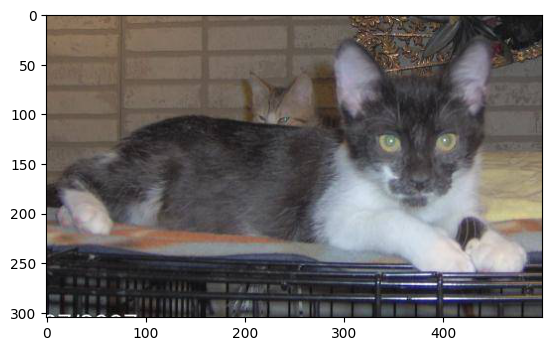

In [9]:
# display cat image
img = mpimg.imread('/content/train/cat.4698.jpg')
imgplt = plt.imshow(img)
plt.show()

In [10]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [11]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

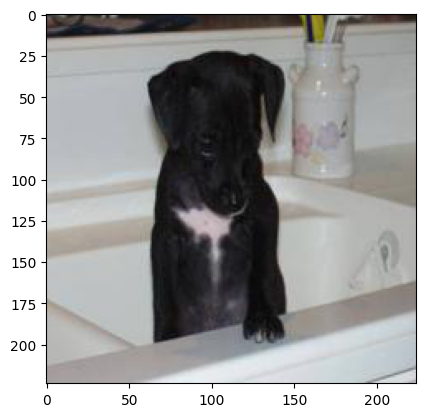

In [12]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [13]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [14]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 1, 1]
2000


In [15]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 991 1009]


In [16]:
import cv2
import glob

In [17]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
X = dog_cat_images
Y = np.asarray(labels)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [21]:
import tensorflow as tf
import tensorflow_hub as hub

In [22]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [23]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [25]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 56s 1s/step - loss: 0.1686 - acc: 0.9419
Epoch 2/5
50/50 [==============================] - 43s 858ms/step - loss: 0.0662 - acc: 0.9831
Epoch 3/5
50/50 [==============================] - 43s 856ms/step - loss: 0.0465 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 42s 851ms/step - loss: 0.0364 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 43s 857ms/step - loss: 0.0284 - acc: 0.9925


In [26]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0714 - acc: 0.9700
Test Loss = 0.0714321881532669
Test Accuracy = 0.9700000286102295


Path of the image to be predicted: /content/train/dog.5611.jpg


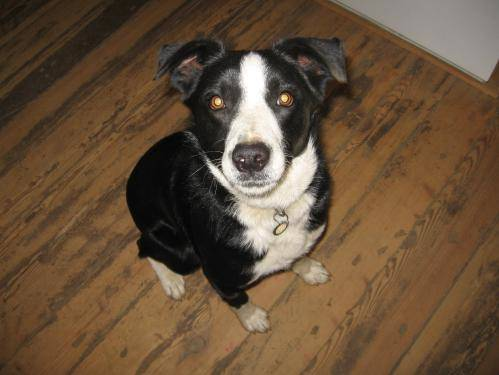

1/1 [==============================] - 0s 438ms/step
[[-2.7411735  2.4976609]]
1
The image represents a Dog


In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')